# Exploring SACLA SFX_sample.h5

The file is of limited use, as it contains only 1 image of the octal detector. Nevertheless, some features can be already seen.

The test file can be found here: http://xfel.riken.jp/users/bml06.html

Let's first start loading some utilities:

In [61]:
%matplotlib inline

import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# matplotlib cfg
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['image.origin'] = "nearer"
   
# fancy interactive plotting
from mpld3 import disable_notebook, enable_notebook, plugins
disable_notebook()

# loading some utils
sys.path.append( os.environ["PWD"]+"/../utilities/" )
from analysis import print_leaf, per_pixel_correction, rebin

Then, load the file. Plotting just the image does not reveal too much....

<matplotlib.colorbar.Colorbar instance at 0x7fe192c2afc8>

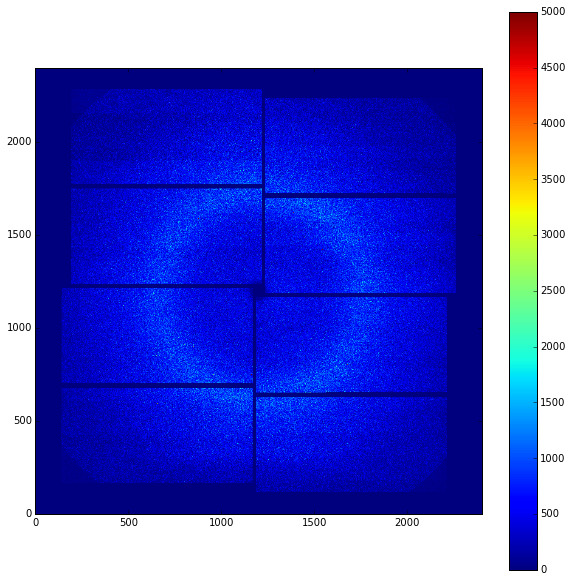

In [62]:
f = h5py.File("/home/sala/Downloads/SFX_sample.h5")
run = "94367"
#print_leaf(f, "/")

dset_name = "/run_94367/detector_2d_assembled_1/tag_368755080/detector_data"
dset = f[dset_name][:]

# There are <0 pixel values,probably due to some corrections, mostly in the regions without sensors
dset [dset<0] = 0
plt.imshow(dset, vmax=5000)
plt.colorbar()

#plt.plot(m.mean(axis=1))
#h = plt.hist(m.flatten(), bins=range(0,1000, 1), log=True)

Nice. We can see already some interesting structures... let's plot the ADC count histogram:

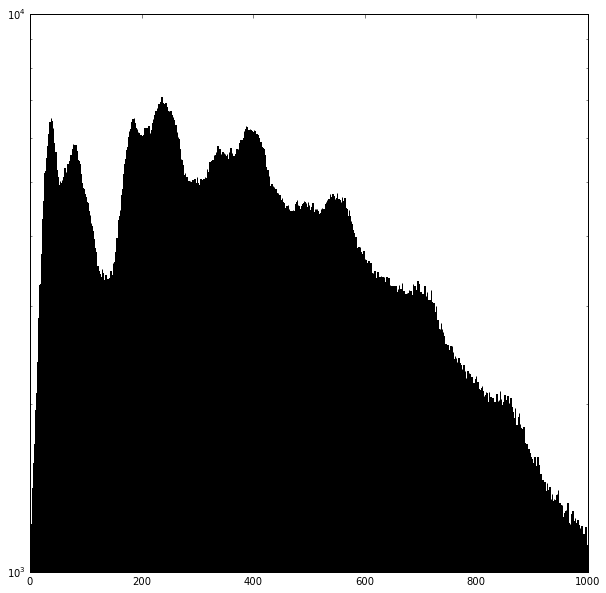

In [63]:
#plt.plot(m.mean(axis=1))
h = plt.hist(dset.flatten(), bins=range(1,1000, 1), log=True)

Those structures in the 0 (possibly), 1, etc photon peaks should not be there. Masking everything e.g. >70 shows:

<matplotlib.colorbar.Colorbar instance at 0x7fe192d44b00>

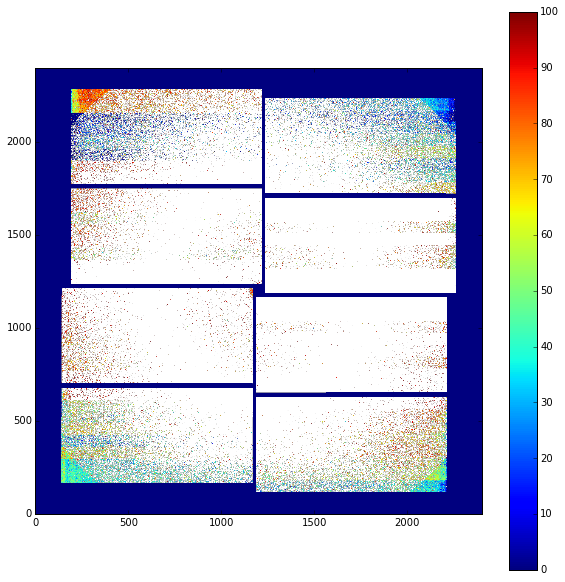

In [60]:
m = np.ma.masked_where(dset>100, dset)
plt.imshow(m)
plt.colorbar()

Clearly, every strip region in the MPCCD tiles have different background values. A dark image subtraction can solve this